In [1]:
import pandas as pd
import numpy as np

def calculate_smoothed_displacement(row, window_size=10):
    data = pd.to_numeric(row[19:139], errors='coerce')  # Adjusted column range
    smoothed_data = data.rolling(window=window_size, center=True).mean()

    max_value_smoothed = smoothed_data.max() if np.isfinite(smoothed_data.max()) else 0
    min_value_smoothed = smoothed_data.min() if np.isfinite(smoothed_data.min()) else 0
    return max_value_smoothed - min_value_smoothed

datasets = ['df_160', 'df_210', 'df_270', 'df_320', 'df_360', 'df_380']

dfs = {}
for dataset in datasets:
    dfs[dataset] = pd.read_csv(f'../dataset/velocity_dfs/data_velocity_{dataset.split("_")[1]}.csv')

for dataset in dfs:
    dfs[dataset]['smoothed_displacement'] = dfs[dataset].apply(calculate_smoothed_displacement, axis=1)

combined_df = pd.concat(dfs.values(), ignore_index=True)

combined_df

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,Right,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,Right,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,Right,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,Right,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,Right,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,28/06/2005 18:14:50,19228.875,0,188595,1,14,1,1,380.0,9.776876,...,-0.001156,-0.001136,-0.001186,-0.001117,-0.001117,NaN,7,Left,0.000269,0.000242
4508,28/06/2005 18:19:50,19529.266,0,191533,1,14,1,1,380.0,9.776876,...,-0.001186,-0.001136,-0.001127,-0.001166,-0.001117,NaN,7,Left,0.000289,0.000249
4509,28/06/2005 18:24:51,19830.219,0,194473,1,14,1,1,380.0,9.776876,...,-0.001206,-0.001127,-0.001136,-0.001176,-0.001107,NaN,7,Left,0.000279,0.000247
4510,28/06/2005 18:29:52,20130.969,0,197411,1,14,1,1,380.0,9.776876,...,-0.001146,-0.001127,-0.001166,-0.001107,-0.001107,NaN,7,Left,0.000282,0.000243


In [2]:
# Modify the 'position' column: "Right" becomes 0, "Left" becomes 1
combined_df['position'] = combined_df['position'].replace({'Right': 0, 'Left': 1})
# 18
combined_df.iloc[:, :]

C:\Users\alira\AppData\Local\Temp\ipykernel_26008\128205078.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  combined_df['position'] = combined_df['position'].replace({'Right': 0, 'Left': 1})


,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,134,135,136,137,138,139,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,0.003542,0.003542,0.003572,0.003522,0.003562,NaN,2,0,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003522,0.003562,0.003552,NaN,2,0,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,0.003582,0.003542,0.003552,0.003622,0.003512,NaN,2,0,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,0.003542,0.003592,0.003532,0.003552,0.003592,NaN,2,0,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,0.003572,0.003592,0.003532,0.003582,0.003572,NaN,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,28/06/2005 18:14:50,19228.875,0,188595,1,14,1,1,380.0,9.776876,...,-0.001156,-0.001136,-0.001186,-0.001117,-0.001117,NaN,7,1,0.000269,0.000242
4508,28/06/2005 18:19:50,19529.266,0,191533,1,14,1,1,380.0,9.776876,...,-0.001186,-0.001136,-0.001127,-0.001166,-0.001117,NaN,7,1,0.000289,0.000249
4509,28/06/2005 18:24:51,19830.219,0,194473,1,14,1,1,380.0,9.776876,...,-0.001206,-0.001127,-0.001136,-0.001176,-0.001107,NaN,7,1,0.000279,0.000247
4510,28/06/2005 18:29:52,20130.969,0,197411,1,14,1,1,380.0,9.776876,...,-0.001146,-0.001127,-0.001166,-0.001107,-0.001107,NaN,7,1,0.000282,0.000243


In [3]:
combined_df = combined_df.drop(combined_df.columns[18:140], axis=1)

combined_df.head()

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,12,13,14,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,1.476480e-07,9.482670e-08,NaN,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,1.476480e-07,9.482670e-08,NaN,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,1.476480e-07,9.482670e-08,NaN,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,1.445110e-07,9.482670e-08,NaN,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,1.445110e-07,9.482670e-08,NaN,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166


In [4]:
combined_df = combined_df.drop(combined_df.columns[14], axis=1)


In [5]:
combined_df

,Date,Period,2,Cycle_Number,4,5,6,7,velocity,9,...,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,1,15,1,1,160.0,4.116579,...,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,1,15,1,1,160.0,4.116579,...,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,1,15,1,1,160.0,4.116579,...,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,1,15,1,1,160.0,4.116579,...,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,1,15,1,1,160.0,4.116579,...,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,28/06/2005 18:14:50,19228.875,0,188595,1,14,1,1,380.0,9.776876,...,7.619870e-08,1.150440e-07,1.009010e-07,-0.001520,-0.004245,0.000139,7,1,0.000269,0.000242
4508,28/06/2005 18:19:50,19529.266,0,191533,1,14,1,1,380.0,9.776876,...,7.619870e-08,1.158750e-07,1.009010e-07,-0.001520,-0.004238,0.000139,7,1,0.000289,0.000249
4509,28/06/2005 18:24:51,19830.219,0,194473,1,14,1,1,380.0,9.776876,...,8.653180e-08,1.161450e-07,1.009010e-07,-0.001433,-0.004235,0.000139,7,1,0.000279,0.000247
4510,28/06/2005 18:29:52,20130.969,0,197411,1,14,1,1,380.0,9.776876,...,8.734500e-08,1.074240e-07,1.009010e-07,-0.001433,-0.004205,0.000139,7,1,0.000282,0.000243


In [6]:
unique_values_col4 = combined_df.iloc[:, 4].unique()

print(unique_values_col4)


[1]


In [7]:
unique_values_col4 = combined_df.iloc[:, 5].unique()

print(unique_values_col4)


[15 14]


In [8]:
unique_values_col4 = combined_df.iloc[:, 6].unique()

print(unique_values_col4)


[1]


In [9]:
unique_values_col4 = combined_df.iloc[:, 7].unique()

print(unique_values_col4)


[1]


In [10]:
combined_df = combined_df.drop(combined_df.columns[4:8], axis=1)


In [11]:
combined_df

,Date,Period,2,Cycle_Number,velocity,9,10,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,0,1542,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,0,2777,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,0,4014,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,0,5249,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,0,6489,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,28/06/2005 18:14:50,19228.875,0,188595,380.0,9.776876,1.0,7.619870e-08,1.150440e-07,1.009010e-07,-0.001520,-0.004245,0.000139,7,1,0.000269,0.000242
4508,28/06/2005 18:19:50,19529.266,0,191533,380.0,9.776876,1.0,7.619870e-08,1.158750e-07,1.009010e-07,-0.001520,-0.004238,0.000139,7,1,0.000289,0.000249
4509,28/06/2005 18:24:51,19830.219,0,194473,380.0,9.776876,1.0,8.653180e-08,1.161450e-07,1.009010e-07,-0.001433,-0.004235,0.000139,7,1,0.000279,0.000247
4510,28/06/2005 18:29:52,20130.969,0,197411,380.0,9.776876,1.0,8.734500e-08,1.074240e-07,1.009010e-07,-0.001433,-0.004205,0.000139,7,1,0.000282,0.000243


In [12]:
unique_values_col4 = combined_df.iloc[:, 2].unique()

print(unique_values_col4)


[0]


In [13]:
combined_df = combined_df.drop(combined_df.columns[2], axis=1)
combined_df


,Date,Period,Cycle_Number,velocity,9,10,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,26/01/2005 17:49:45,300.641,1542,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,26/01/2005 17:54:45,600.656,2777,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,26/01/2005 17:59:46,901.156,4014,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,26/01/2005 18:04:46,1201.391,5249,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,26/01/2005 18:09:46,1502.000,6489,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,28/06/2005 18:14:50,19228.875,188595,380.0,9.776876,1.0,7.619870e-08,1.150440e-07,1.009010e-07,-0.001520,-0.004245,0.000139,7,1,0.000269,0.000242
4508,28/06/2005 18:19:50,19529.266,191533,380.0,9.776876,1.0,7.619870e-08,1.158750e-07,1.009010e-07,-0.001520,-0.004238,0.000139,7,1,0.000289,0.000249
4509,28/06/2005 18:24:51,19830.219,194473,380.0,9.776876,1.0,8.653180e-08,1.161450e-07,1.009010e-07,-0.001433,-0.004235,0.000139,7,1,0.000279,0.000247
4510,28/06/2005 18:29:52,20130.969,197411,380.0,9.776876,1.0,8.734500e-08,1.074240e-07,1.009010e-07,-0.001433,-0.004205,0.000139,7,1,0.000282,0.000243


In [14]:
combined_df = combined_df.drop(combined_df.columns[0], axis=1)
combined_df


,Period,Cycle_Number,velocity,9,10,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,600.656,2777,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,901.156,4014,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,1201.391,5249,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,1502.000,6489,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,19228.875,188595,380.0,9.776876,1.0,7.619870e-08,1.150440e-07,1.009010e-07,-0.001520,-0.004245,0.000139,7,1,0.000269,0.000242
4508,19529.266,191533,380.0,9.776876,1.0,7.619870e-08,1.158750e-07,1.009010e-07,-0.001520,-0.004238,0.000139,7,1,0.000289,0.000249
4509,19830.219,194473,380.0,9.776876,1.0,8.653180e-08,1.161450e-07,1.009010e-07,-0.001433,-0.004235,0.000139,7,1,0.000279,0.000247
4510,20130.969,197411,380.0,9.776876,1.0,8.734500e-08,1.074240e-07,1.009010e-07,-0.001433,-0.004205,0.000139,7,1,0.000282,0.000243


Two Options for Modeling:
1. Train separate models for each curve (i.e., each combination of experiment, position, and velocity):
- Pros:
    - Each model will focus on a specific setup, so it will capture the unique behavior of that particular experiment/position/velocity combination.
    - You avoid potential interference between the dynamics of different curves.
- Cons:
    - This will require training a separate model for each combination, which could be computationally expensive if there are many combinations.
    - It may be harder to generalize to new conditions or combinations


2. Train a single model for all curves together and provide experiment/position/velocity as inputs:
- Pros:
    - You only need one model, and the model may be able to generalize across different experiments, positions, and velocities.
    - It's more scalable if you have many combinations.
- Cons:
    - It could be harder for the model to learn the nuances of each curve, especially if the curves have very different behaviors.
    - There may be some interference between different curves, reducing the accuracy of predictions for specific conditions.

# Train separate models for each curve

In [15]:
df_filtered_160_2_0 = combined_df[(combined_df['experiment_number'] == 2) & 
                          (combined_df['position'] == 0) & 
                          (combined_df['velocity'] == 160)]

In [16]:
df_filtered_160_2_0

,Period,Cycle_Number,velocity,9,10,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,600.656,2777,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,901.156,4014,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,1201.391,5249,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,1502.000,6489,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47179.187,194525,160.0,4.116579,1.0,6.992620e-08,1.176920e-07,7.857060e-08,-0.010790,-0.008892,-0.004856,2,0,0.000185,0.000161
157,47479.891,195763,160.0,4.116579,1.0,6.992620e-08,1.176920e-07,7.857060e-08,-0.010790,-0.008892,-0.004856,2,0,0.000190,0.000169
158,47780.484,197001,160.0,4.116579,1.0,6.992620e-08,1.176920e-07,7.857060e-08,-0.010790,-0.008892,-0.004856,2,0,0.000195,0.000166
159,48080.625,198236,160.0,4.116579,1.0,6.992620e-08,1.176920e-07,7.857060e-08,-0.010790,-0.008892,-0.004856,2,0,0.000185,0.000157


In [17]:
import xgboost as xgb
from sklearn.model_selection import train_test_split


# Define X (features) and y (target)
X = df_filtered_160_2_0[['velocity', 'Cycle_Number']]
y = df_filtered_160_2_0['smoothed_displacement']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror')
model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [18]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f"R-squared Score: {r2}")


Mean Squared Error: 1.464549081850681e-11
R-squared Score: -0.02205485728868295


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = df_filtered_160_2_0[['Cycle_Number']]
y = df_filtered_160_2_0['smoothed_displacement']

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(
        n_estimators=100,           # Control number of trees
        max_depth=5,               # Limit depth to reduce complexity
        min_samples_split=10,       # More samples required to split a node
        min_samples_leaf=4,         # More samples required at a leaf node
        max_features='sqrt',        # Consider only sqrt(number of features) at each split
        random_state=42
    ),
    "Support Vector Regressor": SVR(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared Score: {r2}\n")

Linear Regression - Mean Squared Error: 1.3874828817695001e-11
Linear Regression - R-squared Score: 0.031726805000312885

Random Forest - Mean Squared Error: 1.4858043961311563e-11
Random Forest - R-squared Score: -0.03688815818161428

Support Vector Regressor - Mean Squared Error: 2.6312802606058536e-11
Support Vector Regressor - R-squared Score: -0.8362735701842698

Neural Network - Mean Squared Error: 79900.90162933519
Neural Network - R-squared Score: -5575989608269972.0



#  Train a single model for all curves together and provide experiment/position/velocity as inputs:

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

X = combined_df[['velocity', 'Cycle_Number', 'experiment_number', 'position']]
y = combined_df['smoothed_displacement']

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Support Vector Regressor": SVR(),
    "Neural Network": MLPRegressor(hidden_layer_sizes=(100,), max_iter=10000, random_state=42)
}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{name} - Mean Squared Error: {mse}")
    print(f"{name} - R-squared Score: {r2}\n")

Linear Regression - Mean Squared Error: 6.68171337496439e-10
Linear Regression - R-squared Score: 0.5574866278249496

Random Forest - Mean Squared Error: 2.818071659693187e-11
Random Forest - R-squared Score: 0.9813366074960015

Support Vector Regressor - Mean Squared Error: 3.095516651517141e-09
Support Vector Regressor - R-squared Score: -1.0500842152544

Neural Network - Mean Squared Error: 0.3863255679254557
Neural Network - R-squared Score: -255853879.92323843



In [21]:
X = combined_df[['velocity', 'Cycle_Number', 'position']]
y = combined_df['smoothed_displacement']

model_forest =  RandomForestRegressor(n_estimators=10, random_state=42)
model_regression = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_forest.fit(X_train, y_train)
model_regression.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)
y_pred_regression = model_regression.predict(X_test)

mse_forst = mean_squared_error(y_test, y_pred_forest)
r2_forst = r2_score(y_test, y_pred_forest)


mse_regression = mean_squared_error(y_test, y_pred_regression)
r2_regression = r2_score(y_test, y_pred_regression)

print(f"{name} - Forest R-squared Score: {r2_forst}\n")
print(f"{name} - Regression R-squared Score: {r2_regression}\n")


Neural Network - Forest R-squared Score: 0.42761614710283347

Neural Network - Regression R-squared Score: 0.47496225225236366



In [22]:
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [160.0],
    'Cycle_Number': [3000],
    'experiment_number': [2],
    'position': [0]
})

# Predict the displacement
predicted_displacement = model_regression.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- experiment_number


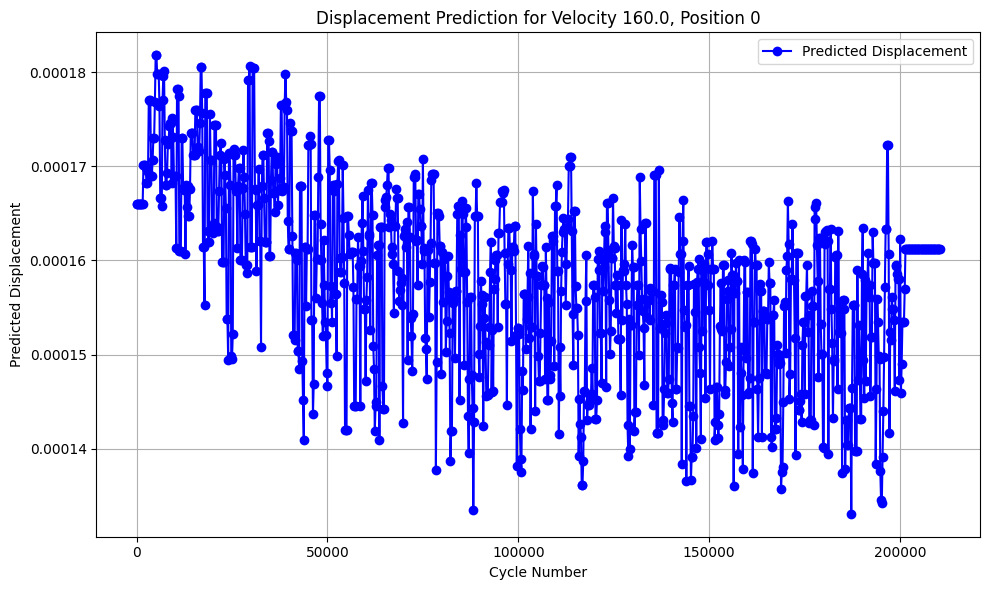

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_and_plot_displacement(model, start_cycle, end_cycle, step_size, velocity, experiment_number, position):
    # Create a dataframe with dynamic cycle numbers, incremented by step_size
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers,
        # 'experiment_number': [experiment_number] * len(cycle_numbers),
        'position': [position] * len(cycle_numbers)
    })

    # Predict the displacement for the generated cycle numbers
    predicted_displacement = model.predict(new_data)

    # Plotting the predicted displacements
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_displacement, label='Predicted Displacement', color='blue', marker='o')
    plt.xlabel('Cycle Number')
    plt.ylabel('Predicted Displacement')
    plt.title(f'Displacement Prediction for Velocity {velocity}, Position {position}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Example usage of the function 199473
generate_and_plot_displacement(model_forest, start_cycle=0, end_cycle=210473, step_size=200, velocity=160.0, experiment_number=2, position=0)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define Random Forest with some constraints to avoid overfitting
model_forest_constraint = RandomForestRegressor(
    n_estimators=100,           # Control number of trees
    max_depth=10,               # Limit depth to reduce complexity
    min_samples_split=10,       # More samples required to split a node
    min_samples_leaf=4,         # More samples required at a leaf node
    max_features='sqrt',        # Consider only sqrt(number of features) at each split
    random_state=42
)

# Train the model
model_forest_constraint.fit(X_train, y_train)

# Predict on test data
y_pred_forest = model_forest_constraint.predict(X_test)

# Evaluate
from sklearn.metrics import mean_squared_error, r2_score
mse_forest = mean_squared_error(y_test, y_pred_forest)
r2_forest = r2_score(y_test, y_pred_forest)

print(f"Random Forest MSE: {mse_forest}")
print(f"Random Forest R-squared: {r2_forest}")


Random Forest MSE: 5.707887994121177e-10
Random Forest R-squared: 0.6219806773304599


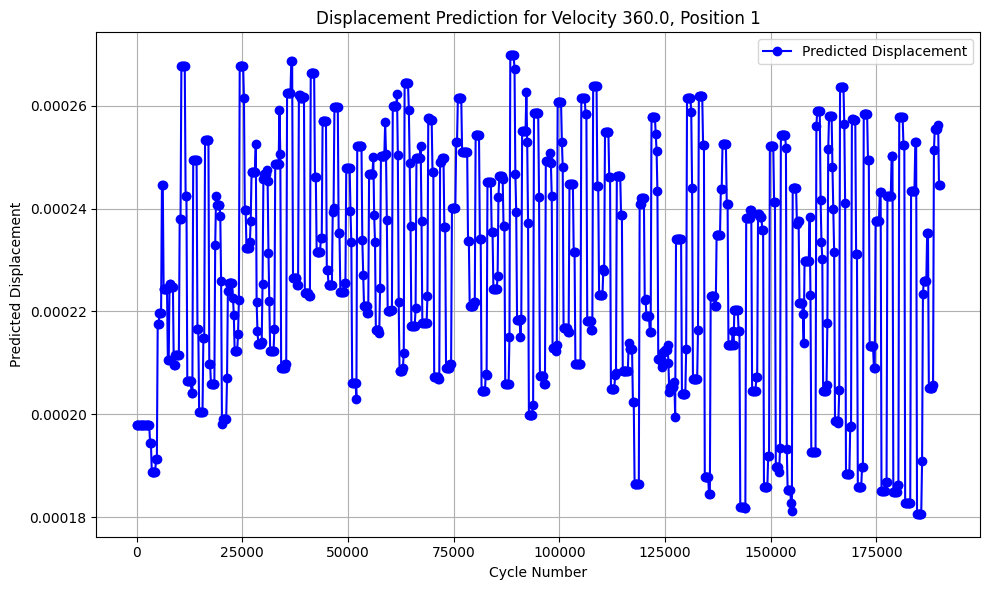

In [27]:
generate_and_plot_displacement(model_forest, start_cycle=0, end_cycle=190000, step_size=200, velocity=360.0, experiment_number=7, position=1)


In [28]:
# 4507	28/06/2005 18:14:50	19228.875	0	188595	1	14	1	1	380.0	7	1	0.000269	0.000242
# Example: predicting the displacement for a new set of velocity and Cycle_Number values
new_data = pd.DataFrame({
    'velocity': [380.0],
    'Cycle_Number': [188595],
    'experiment_number': [7],
    'position': [1]
})

# Predict the displacement
predicted_displacement = model_forest_constraint.predict(new_data)

# Display the predicted displacement
print(f"Predicted Displacement: {predicted_displacement[0]}")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- experiment_number


In [125]:
combined_df

,Period,Cycle_Number,velocity,9,10,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement
0,300.641,1542,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167
1,600.656,2777,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169
2,901.156,4014,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166
3,1201.391,5249,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183
4,1502.000,6489,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,19228.875,188595,380.0,9.776876,1.0,7.619870e-08,1.150440e-07,1.009010e-07,-0.001520,-0.004245,0.000139,7,1,0.000269,0.000242
4508,19529.266,191533,380.0,9.776876,1.0,7.619870e-08,1.158750e-07,1.009010e-07,-0.001520,-0.004238,0.000139,7,1,0.000289,0.000249
4509,19830.219,194473,380.0,9.776876,1.0,8.653180e-08,1.161450e-07,1.009010e-07,-0.001433,-0.004235,0.000139,7,1,0.000279,0.000247
4510,20130.969,197411,380.0,9.776876,1.0,8.734500e-08,1.074240e-07,1.009010e-07,-0.001433,-0.004205,0.000139,7,1,0.000282,0.000243


In [126]:
from scipy.signal import savgol_filter

def add_smoothed_curve_to_all(df):
    df['Period'] = pd.to_datetime(df['Period'], errors='coerce')

    df['smoothed_curve'] = savgol_filter(df['smoothed_displacement'], window_length=11, polyorder=3)

    return df

combined_df = add_smoothed_curve_to_all(combined_df)




In [127]:
combined_df

,Period,Cycle_Number,velocity,9,10,11,12,13,15,16,17,experiment_number,position,displacement,smoothed_displacement,smoothed_curve
0,1970-01-01 00:00:00.000000300,1542,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000167,0.000166
1,1970-01-01 00:00:00.000000600,2777,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000197,0.000169,0.000169
2,1970-01-01 00:00:00.000000901,4014,160.0,4.116579,1.0,6.349900e-08,1.476480e-07,9.482670e-08,-0.010842,-0.009141,-0.005062,2,0,0.000187,0.000166,0.000171
3,1970-01-01 00:00:00.000001201,5249,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000205,0.000183,0.000172
4,1970-01-01 00:00:00.000001502,6489,160.0,4.116579,1.0,6.349900e-08,1.445110e-07,9.482670e-08,-0.010842,-0.009130,-0.005062,2,0,0.000190,0.000166,0.000172
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4507,1970-01-01 00:00:00.000019228,188595,380.0,9.776876,1.0,7.619870e-08,1.150440e-07,1.009010e-07,-0.001520,-0.004245,0.000139,7,1,0.000269,0.000242,0.000247
4508,1970-01-01 00:00:00.000019529,191533,380.0,9.776876,1.0,7.619870e-08,1.158750e-07,1.009010e-07,-0.001520,-0.004238,0.000139,7,1,0.000289,0.000249,0.000246
4509,1970-01-01 00:00:00.000019830,194473,380.0,9.776876,1.0,8.653180e-08,1.161450e-07,1.009010e-07,-0.001433,-0.004235,0.000139,7,1,0.000279,0.000247,0.000246
4510,1970-01-01 00:00:00.000020130,197411,380.0,9.776876,1.0,8.734500e-08,1.074240e-07,1.009010e-07,-0.001433,-0.004205,0.000139,7,1,0.000282,0.000243,0.000244


In [133]:
X = combined_df[['velocity', 'Cycle_Number', 'experiment_number', 'position']]
y = combined_df['smoothed_curve']

model_forest =  RandomForestRegressor(n_estimators=10, random_state=42)
model_regression = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


model_forest.fit(X_train, y_train)
model_regression.fit(X_train, y_train)
y_pred_forest = model_forest.predict(X_test)
y_pred_regression = model_regression.predict(X_test)

mse_forst = mean_squared_error(y_test, y_pred_forest)
r2_forst = r2_score(y_test, y_pred_forest)


mse_regression = mean_squared_error(y_test, y_pred_regression)
r2_regression = r2_score(y_test, y_pred_regression)

print(f"{name} - Forest R-squared Score: {r2_forst}\n")
print(f"{name} - Regression R-squared Score: {r2_regression}\n")


Neural Network - Forest R-squared Score: 0.9946398740671795

Neural Network - Regression R-squared Score: 0.56147236888482



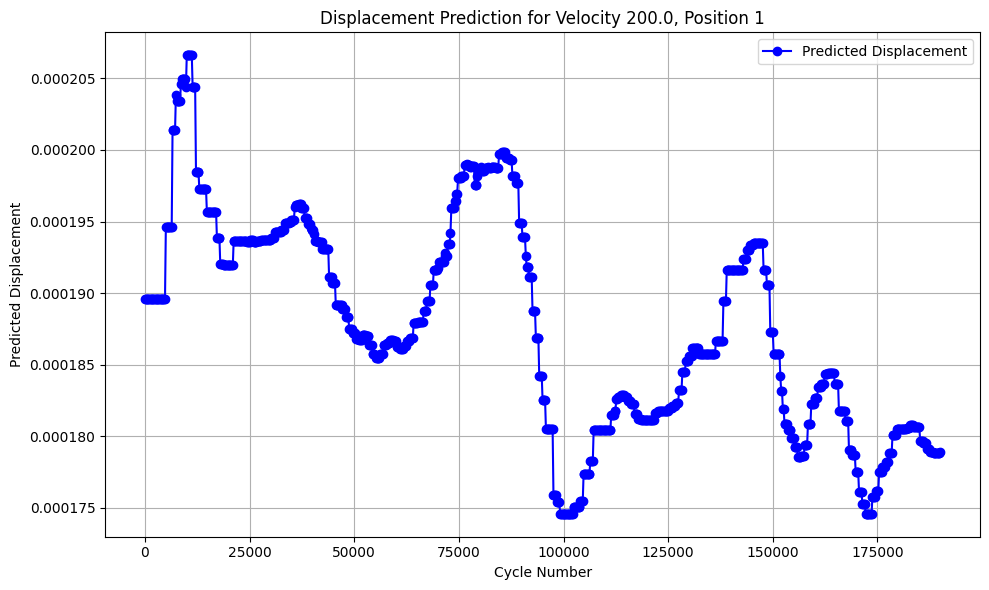

In [137]:
import pandas as pd
import matplotlib.pyplot as plt

def generate_and_plot_displacement(model, start_cycle, end_cycle, step_size, velocity, experiment_number, position):
    # Create a dataframe with dynamic cycle numbers, incremented by step_size
    cycle_numbers = list(range(start_cycle, end_cycle + 1, step_size))
    new_data = pd.DataFrame({
        'velocity': [velocity] * len(cycle_numbers),
        'Cycle_Number': cycle_numbers,
        'experiment_number': [experiment_number] * len(cycle_numbers),
        'position': [position] * len(cycle_numbers)
    })

    # Predict the displacement for the generated cycle numbers
    predicted_displacement = model.predict(new_data)

    # Plotting the predicted displacements
    plt.figure(figsize=(10, 6))
    plt.plot(cycle_numbers, predicted_displacement, label='Predicted Displacement', color='blue', marker='o')
    plt.xlabel('Cycle Number')
    plt.ylabel('Predicted Displacement')
    plt.title(f'Displacement Prediction for Velocity {velocity}, Position {position}')
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()


generate_and_plot_displacement(model_forest, start_cycle=0, end_cycle=190000, step_size=200, velocity=200.0, experiment_number=3, position=1)

1. Prepare the Data: Your current data should be reformatted to use Cycle_Number as the "time" or index, and smoothed_displacement as the target variable for prediction.
2. Choose a Time Series Model:
    - ARIMA (AutoRegressive Integrated Moving Average): Good for univariate time series with linear trends and seasonality.
    - Exponential Smoothing (Holt-Winters): Captures both trends and seasonality.
    - LSTM (Long Short-Term Memory): A deep learning model capable of capturing more complex patterns in sequential data.

3. Train the Model: Use the cycles up to 21000 as training data and then predict future cycles.

c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood

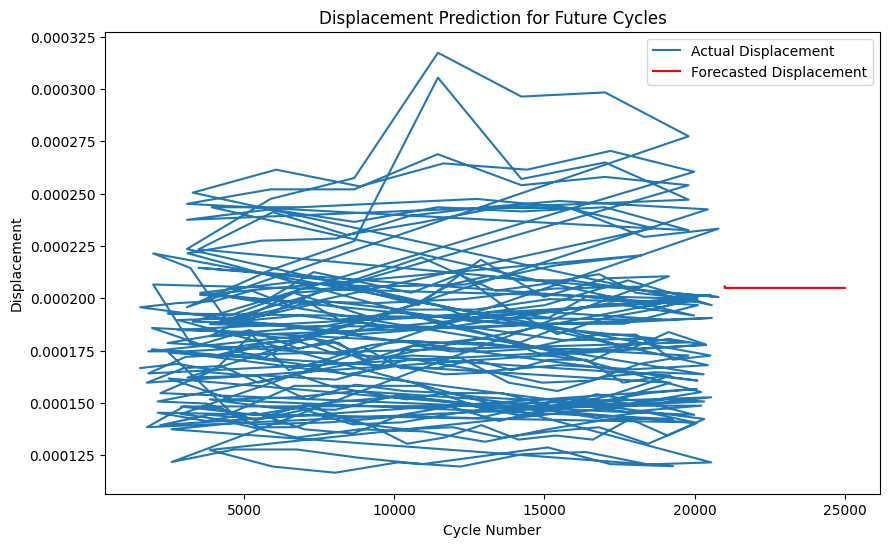

In [25]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Prepare the data
df_filtered = combined_df[combined_df['Cycle_Number'] <= 21000]
df_filtered.set_index('Cycle_Number', inplace=True)  # Set Cycle_Number as the index
y = df_filtered['smoothed_displacement']

# Fit the ARIMA model
model = ARIMA(y, order=(5, 1, 0))  # (p, d, q) order: AR=5, I=1, MA=0, adjust based on your data
model_fit = model.fit()

# Forecast the displacement for future cycles
future_cycles = [i for i in range(21001, 25001)]  # Future cycle numbers you want to predict
forecast = model_fit.forecast(steps=len(future_cycles))  # Forecast for future cycles

# Create a dataframe for predictions
forecast_df = pd.DataFrame({
    'Cycle_Number': future_cycles,
    'Predicted_Displacement': forecast
})

# Plot actual and predicted values
plt.figure(figsize=(10, 6))
plt.plot(df_filtered.index, df_filtered['smoothed_displacement'], label='Actual Displacement')
plt.plot(forecast_df['Cycle_Number'], forecast_df['Predicted_Displacement'], label='Forecasted Displacement', color='red')
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('Displacement Prediction for Future Cycles')
plt.legend()
plt.show()


In [30]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Prepare the data
df_filtered = combined_df[combined_df['Cycle_Number'] <= 21000]
y = df_filtered['smoothed_displacement'].values

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.reshape(-1, 1))

# Reshape into LSTM-compatible format
X, y = [], []
window_size = 50  # The look-back window
for i in range(len(y_scaled) - window_size):
    X.append(y_scaled[i:i + window_size])
    y.append(y_scaled[i + window_size])
X, y = np.array(X), np.array(y)

# Reshape for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build LSTM model
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_lstm.add(LSTM(units=50))
model_lstm.add(Dense(1))

# Compile the model
model_lstm.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model_lstm.fit(X, y, epochs=10, batch_size=32)

# Predict future displacements
future_predictions = model_lstm.predict(X[-window_size:])
future_predictions = scaler.inverse_transform(future_predictions)

# Plot actual vs predicted
plt.plot(df_filtered.index, df_filtered['smoothed_displacement'], label='Actual Displacement')
plt.plot(range(21001, 25001), future_predictions, label='Predicted Displacement', color='red')
plt.xlabel('Cycle Number')
plt.ylabel('Displacement')
plt.title('LSTM Forecasted Displacement')
plt.legend()
plt.show()


c:\Users\alira\anaconda3\envs\FYP\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


ValueError: object __array__ method not producing an array